# K Nearest Neighbors


## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
import numpy as np

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df=pd.read_csv("ensembles_knn_data.csv")

In [4]:
df.head(3)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1


# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [8]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [10]:
scaler = StandardScaler()
#scaler = preprocessing.StandardScaler().fit(X_train)

** Fit scaler to the  NUMERICAL features (Drop categoical).**

In [48]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
out2 = scaler.transform(df.drop('TARGET CLASS', axis=1))
out2

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Use the .transform() method to transform the features to a scaled version.**

In [40]:

#dfx=df.iloc[:,:9]
#dfy = df.iloc[:,10]
#columns= df.colu
fitdf_df = pd.DataFrame(fitdf)
fitdf_df


,0,1,2,3,4,5,6,7,8
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603
5,1.437244,-0.827457,0.847975,-0.914267,-0.102903,1.375667,-1.137473,0.029738,-1.101580
6,1.192634,-0.432092,-0.970855,1.238040,0.982445,0.728702,-0.849378,0.616467,-0.956891
7,0.317560,0.446607,-1.677772,-0.347079,0.489673,-1.024006,-0.433190,-1.198889,-0.357902
8,-0.581391,0.249681,-1.368313,1.150715,1.703935,-0.059437,-0.266295,-0.519027,0.496928
9,-0.071150,-2.014273,-0.778997,-0.462438,0.007273,0.867458,-1.517317,0.777843,0.614484


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [52]:
df_feat = pd.DataFrame(out2, columns = df.columns[:-1]) 

In [53]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set, test_size=0.4.**

In [54]:
# from sklearn.model_selection import cross_val_score
# (before v0.18)

from sklearn.model_selection import train_test_split


In [56]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [57]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [61]:
neigh = KNeighborsClassifier(n_neighbors=1) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Fit this KNN model to the training data.**

In [62]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [64]:
pred = neigh.predict(X_test)

** Create a confusion matrix and classification report.**

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, pred)

array([[141,  58],
       [ 57, 144]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.71      0.71      0.71       199
          1       0.71      0.72      0.71       201

avg / total       0.71      0.71      0.71       400



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list..**

In [71]:
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # average number of 1,s in the list

**Now create the following plot using the information from your for loop.**

Text(0,0.5,'Error Rate')

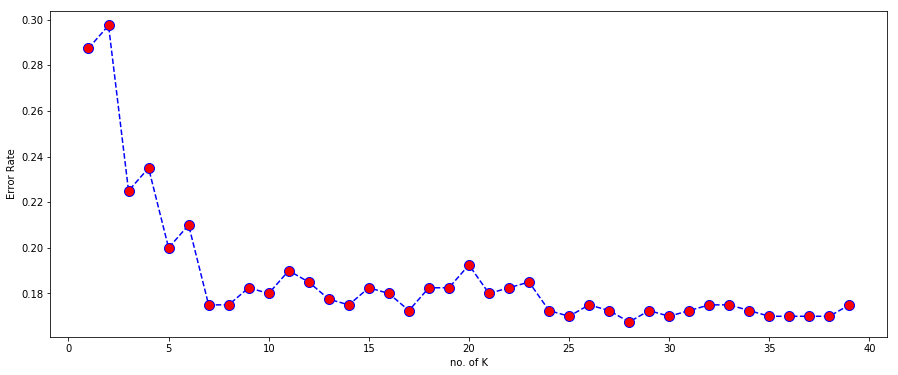

In [72]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [73]:
knn = KNeighborsClassifier(n_neighbors = 28 )
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[166  33]
 [ 34 167]]
             precision    recall  f1-score   support

          0       0.83      0.83      0.83       199
          1       0.83      0.83      0.83       201

avg / total       0.83      0.83      0.83       400

